# Predictions in Social Media Using Machine Learning

INFO 1998 Final Project

Sohan Madishetty, Sanya Mahajan, Nathan Varghese, Vansh Bherwal

Introduction: This project aims to analyze the effect of social media on indviduals by using concepts learned in the course INFO 1998. Some specific questions we are looking at are how does the amount of time spent on social media impact their mental health and how does the amount of time spent on social media impact if one feels depressed or not? 

Our hypthoesis is that if an individual spends more time on social media, then they are likely to face depression than someone who does not and spending time on social media will negatively affect their mental health.

Dataset: https://www.kaggle.com/datasets/souvikahmed071/social-media-and-mental-health/data

Data:
The set contains these columns to analyze:
- Age
- Gender
- Relationship Status
- Occupation Status
- type of organizations affiliated with
- social media use (yes/no)
- social media platforms commonly used
- average time spent on social media every day (hrs)
- How often do you find yourself using Social media without a specific purpose
- How often do you get distracted by Social media when you are busy doing something?
- Do you feel restless if you haven't used Social media in a while?
- On a scale of 1 to 5, how easily distracted are you?
- On a scale of 1 to 5, how much are you bothered by worries?
- Do you find it difficult to concentrate on things?
- On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?
- Following the previous question, how do you feel about these comparisons, generally speaking?
- How often do you look to seek validation from features of social media?
- How often do you feel depressed or down?
- On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?
- On a scale of 1 to 5, how often do you face issues regarding sleep?

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

df = pd.read_csv('/Users/Sohan/FinalProject/smmh.csv')
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 21 columns):
 #   Column                                                                                                                Non-Null Count  Dtype  
---  ------                                                                                                                --------------  -----  
 0   Timestamp                                                                                                             481 non-null    object 
 1   1. What is your age?                                                                                                  481 non-null    float64
 2   2. Gender                                                                                                             481 non-null    object 
 3   3. Relationship Status                                                                                                481 non-null    object 
 4   4. Occup

,Timestamp,1. What is your age?,2. Gender,3. Relationship Status,4. Occupation Status,5. What type of organizations are you affiliated with?,6. Do you use social media?,7. What social media platforms do you commonly use?,8. What is the average time you spend on social media every day?,9. How often do you find yourself using Social media without a specific purpose?,...,11. Do you feel restless if you haven't used Social media in a while?,"12. On a scale of 1 to 5, how easily distracted are you?","13. On a scale of 1 to 5, how much are you bothered by worries?",14. Do you find it difficult to concentrate on things?,"15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?","16. Following the previous question, how do you feel about these comparisons, generally speaking?",17. How often do you look to seek validation from features of social media?,18. How often do you feel depressed or down?,"19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?","20. On a scale of 1 to 5, how often do you face issues regarding sleep?"
0,4/18/2022 19:18:47,21.0,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5,...,2,5,2,5,2,3,2,5,4,5
1,4/18/2022 19:19:28,21.0,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4,...,2,4,5,4,5,1,1,5,4,5
2,4/18/2022 19:25:59,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,3,...,1,2,5,4,3,3,1,4,2,5
3,4/18/2022 19:29:43,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram",More than 5 hours,4,...,1,3,5,3,5,1,2,4,3,2
4,4/18/2022 19:33:31,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,...,4,4,5,5,3,3,3,4,4,1


In [41]:
df.describe

<bound method NDFrame.describe of                Timestamp  1. What is your age? 2. Gender  \
0     4/18/2022 19:18:47                  21.0      Male   
1     4/18/2022 19:19:28                  21.0    Female   
2     4/18/2022 19:25:59                  21.0    Female   
3     4/18/2022 19:29:43                  21.0    Female   
4     4/18/2022 19:33:31                  21.0    Female   
..                   ...                   ...       ...   
476   5/21/2022 23:38:28                  24.0      Male   
477    5/22/2022 0:01:05                  26.0    Female   
478   5/22/2022 10:29:21                  29.0    Female   
479   7/14/2022 19:33:47                  21.0      Male   
480  11/12/2022 13:16:50                  53.0      Male   

    3. Relationship Status 4. Occupation Status  \
0        In a relationship   University Student   
1                   Single   University Student   
2                   Single   University Student   
3                   Single   University S

Data cleaning: In these segments, we are renaming the columns to make them easier to use later in the model. Additonally, we will be manipulating certain other values so that we will not run into other errors when running through the idea. 

In [42]:
df.rename(columns = {  '1. What is your age?':'Age',
                       '2. Gender':'Sex',
                       '3. Relationship Status':'Relationship_Status',
                       '4. Occupation Status':'Occupation',
                       '5. What type of organizations are you affiliated with?':'Affiliations',
                       '6. Do you use social media?':'Social_Media_User?',
                       '7. What social media platforms do you commonly use?':'Platforms_Used',
                       '8. What is the average time you spend on social media every day?':'Time_Spent',
                       '9. How often do you find yourself using Social media without a specific purpose?':'Distraction_1',
                       '10. How often do you get distracted by Social media when you are busy doing something?':'Distraction_2',
                       "11. Do you feel restless if you haven't used Social media in a while?":'Stress_1',
                       '12. On a scale of 1 to 5, how easily distracted are you?':'Distraction_3',
                       '13. On a scale of 1 to 5, how much are you bothered by worries?':'Stress_2',
                       '14. Do you find it difficult to concentrate on things?':'Distraction_4',
                       '15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?':'SelfEsteem_1',
                       '16. Following the previous question, how do you feel about these comparisons, generally speaking?':'SelfEsteem_2',
                       '17. How often do you look to seek validation from features of social media?':'SelfEsteem_3',
                       '18. How often do you feel depressed or down?':'Depression_1',
                       '19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?':'Depression_2',
                       '20. On a scale of 1 to 5, how often do you face issues regarding sleep?':'Depression_3' },inplace=True)

In [43]:
columnNames = list(df.columns)
columnNames

['Timestamp',
 'Age',
 'Sex',
 'Relationship_Status',
 'Occupation',
 'Affiliations',
 'Social_Media_User?',
 'Platforms_Used',
 'Time_Spent',
 'Distraction_1',
 'Distraction_2',
 'Stress_1',
 'Distraction_3',
 'Stress_2',
 'Distraction_4',
 'SelfEsteem_1',
 'SelfEsteem_2',
 'SelfEsteem_3',
 'Depression_1',
 'Depression_2',
 'Depression_3']

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Timestamp            481 non-null    object 
 1   Age                  481 non-null    float64
 2   Sex                  481 non-null    object 
 3   Relationship_Status  481 non-null    object 
 4   Occupation           481 non-null    object 
 5   Affiliations         451 non-null    object 
 6   Social_Media_User?   481 non-null    object 
 7   Platforms_Used       481 non-null    object 
 8   Time_Spent           481 non-null    object 
 9   Distraction_1        481 non-null    int64  
 10  Distraction_2        481 non-null    int64  
 11  Stress_1             481 non-null    int64  
 12  Distraction_3        481 non-null    int64  
 13  Stress_2             481 non-null    int64  
 14  Distraction_4        481 non-null    int64  
 15  SelfEsteem_1         481 non-null    int

There are no missing data values in this set. However, age is shown is as a float instead of a integer. We will now change this.

In [45]:
df['Age'] = df['Age'].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Timestamp            481 non-null    object
 1   Age                  481 non-null    int64 
 2   Sex                  481 non-null    object
 3   Relationship_Status  481 non-null    object
 4   Occupation           481 non-null    object
 5   Affiliations         451 non-null    object
 6   Social_Media_User?   481 non-null    object
 7   Platforms_Used       481 non-null    object
 8   Time_Spent           481 non-null    object
 9   Distraction_1        481 non-null    int64 
 10  Distraction_2        481 non-null    int64 
 11  Stress_1             481 non-null    int64 
 12  Distraction_3        481 non-null    int64 
 13  Stress_2             481 non-null    int64 
 14  Distraction_4        481 non-null    int64 
 15  SelfEsteem_1         481 non-null    int64 
 16  SelfEste

Now we need to look at Self-Esteem question 2. Initially phrased as follows: "Following the previous question, how do you feel about these comparisons, generally speaking?"

The challenge arises from the interpretation of scores, which differs slightly for this particular question compared to all others.

The score breakdown is as follows:

- Very Negative: 1
- Slightly Negative: 2
- Neutral: 3
- Slightly Positive: 4
- Very Positive: 5

In this study, a higher accumulation of points for a facet of mental well-being indicates a poorer state in that aspect. To maintain this premise, a modification is necessary for the scoring system of this specific question. The revised scoring system is as follows:

- Very Negative: 4
- Slightly Negative: 2
- Neutral: 0
- Slightly Positive: 0
- Very Positive: 0

It's important to note that "Slightly Positive" and "Very Positive" have been assigned 0 values. The focus here is on measuring the negative impact on mental health, hence consideration is limited to the "Neutral," "Slightly Negative," and "Very Negative" options.

In [46]:
df.loc[df['SelfEsteem_2'] == 3, 'SelfEsteem_2'] = 0
df.loc[df['SelfEsteem_2'] == 4, 'SelfEsteem_2'] = 0
df.loc[df['SelfEsteem_2'] == 5, 'SelfEsteem_2'] = 0

df.loc[df['SelfEsteem_2'] == 1, 'SelfEsteem_2'] = 4
df.loc[df['SelfEsteem_2'] == 2, 'SelfEsteem_2'] = 2

Now we will create a new column that will calculate the total amount of points from each category from various aspects of mental health and wellbeing.

1. Distractions
2. Stress
3. Self Esteem
4. Depression

The max score is 59.


In [47]:
distraction = ['Distraction_1', 'Distraction_2', 'Distraction_3', 'Distraction_4']
df['Distraction Total'] = df[distraction].sum(axis=1)

Stress = ['Stress_1', 'Stress_2']
df['Stress Total'] = df[Stress].sum(axis=1)

SelfEsteem = ['SelfEsteem_1', 'SelfEsteem_2','SelfEsteem_3']
df['Self Esteem Total'] = df[SelfEsteem].sum(axis=1)

Depression = ['Depression_1', 'Depression_2','Depression_3']
df['Depression Total'] = df[Depression].sum(axis=1)

Total = ['Distraction Total', 'Stress Total','Self Esteem Total','Depression Total']
df['Total'] = df[Total].sum(axis=1)

df.head(5)

,Timestamp,Age,Sex,Relationship_Status,Occupation,Affiliations,Social_Media_User?,Platforms_Used,Time_Spent,Distraction_1,...,SelfEsteem_2,SelfEsteem_3,Depression_1,Depression_2,Depression_3,Distraction Total,Stress Total,Self Esteem Total,Depression Total,Total
0,4/18/2022 19:18:47,21,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5,...,0,2,5,4,5,18,4,4,14,40
1,4/18/2022 19:19:28,21,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4,...,4,1,5,4,5,15,7,10,14,46
2,4/18/2022 19:25:59,21,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,3,...,0,1,4,2,5,11,6,4,11,32
3,4/18/2022 19:29:43,21,Female,Single,University Student,University,Yes,"Facebook, Instagram",More than 5 hours,4,...,4,2,4,3,2,12,6,11,9,38
4,4/18/2022 19:33:31,21,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,...,0,3,4,4,1,17,9,6,9,41


Previously, it was established that the "Total " indicates magnitude of individual experiencing negative symptoms of mental health. A total  of 59 is the highest an individual can obtain from the questionnaire, which would indicate that the individual is definitely experiencing negative symptoms in some aspect of mental health, based on binary classification.

We will introduce a new variable, which is defined as whether we think that the individual is experiencing mental health disease symptoms in some aspect, and whether we are recommending the participant to get a mental health checkup or not.

A participant with a score of 3 out of 5 on every question on the questionnaire suggests that they are are experiencing slight to moderate symptoms in every aspect of mental health.

Therefore, we assign a rational value of 40 to be the point where we can reliably say that the individual is very likely to be suffering severely from some symptoms, and thus we highly recommend a mental health checkup.

An Outcome of 0 means that individual is not confirmed to be experiencing severe mental health symptoms. Therefore we do not think the individual needs to go to get a mental health check up.

An Outcome of 1 means that the individual definitely experiencing some severe negative symptoms of mental health. They are recommended to go to get a mental health check up.

In [48]:
def map_score(score):
  if score < 40:
    return "0"
  elif score >= 40:
    return "1"

df['New Score']= df['Total'].apply(lambda score: map_score(score))
df['New Score'] = df['New Score'].astype('int64')

df.head(5)

,Timestamp,Age,Sex,Relationship_Status,Occupation,Affiliations,Social_Media_User?,Platforms_Used,Time_Spent,Distraction_1,...,SelfEsteem_3,Depression_1,Depression_2,Depression_3,Distraction Total,Stress Total,Self Esteem Total,Depression Total,Total,New Score
0,4/18/2022 19:18:47,21,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5,...,2,5,4,5,18,4,4,14,40,1
1,4/18/2022 19:19:28,21,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4,...,1,5,4,5,15,7,10,14,46,1
2,4/18/2022 19:25:59,21,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,3,...,1,4,2,5,11,6,4,11,32,0
3,4/18/2022 19:29:43,21,Female,Single,University Student,University,Yes,"Facebook, Instagram",More than 5 hours,4,...,2,4,3,2,12,6,11,9,38,0
4,4/18/2022 19:33:31,21,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,...,3,4,4,1,17,9,6,9,41,1


Data Visualization: Now we are going visualize parts of our data since we finished cleaning it. We are first going to compare all four totals with the number of hours spent on social media. 

<Axes: xlabel='Time_Spent', ylabel='Mean Distraction Score'>

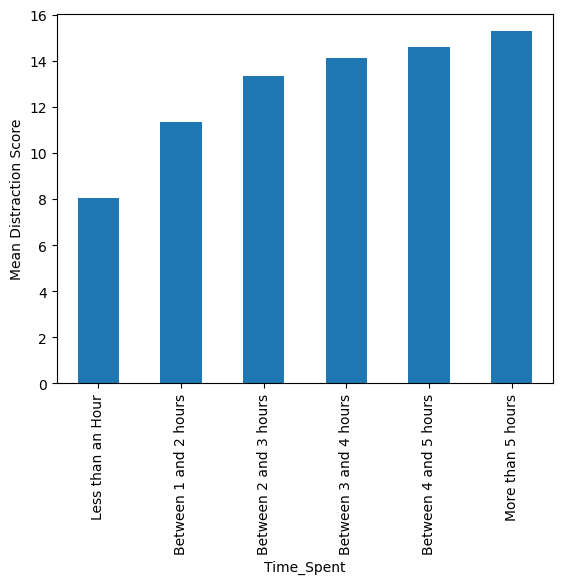

In [49]:
#Let's see the mean Distraction score of each Time group of participants

df.groupby('Time_Spent')['Distraction Total'].mean().sort_values(ascending=True).plot.bar(ylabel='Mean Distraction Score')

<Axes: xlabel='Time_Spent', ylabel='Mean Stress Score'>

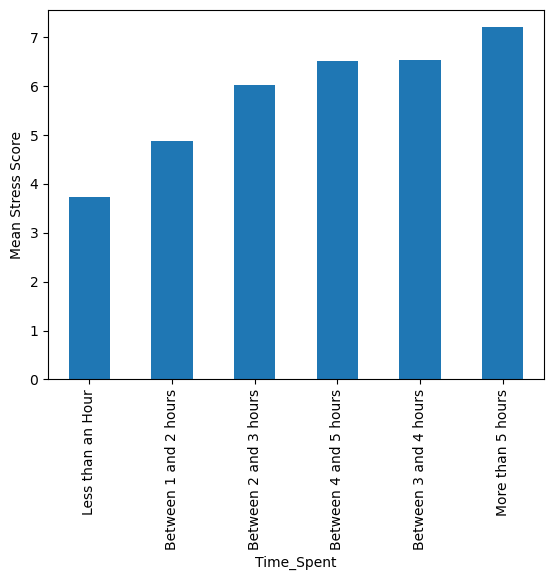

In [50]:
#Let's see the mean stress score of each Time group of participants

df.groupby('Time_Spent')['Stress Total'].mean().sort_values(ascending=True).plot.bar(ylabel='Mean Stress Score')

<Axes: xlabel='Time_Spent', ylabel='Mean Self Esteem Score'>

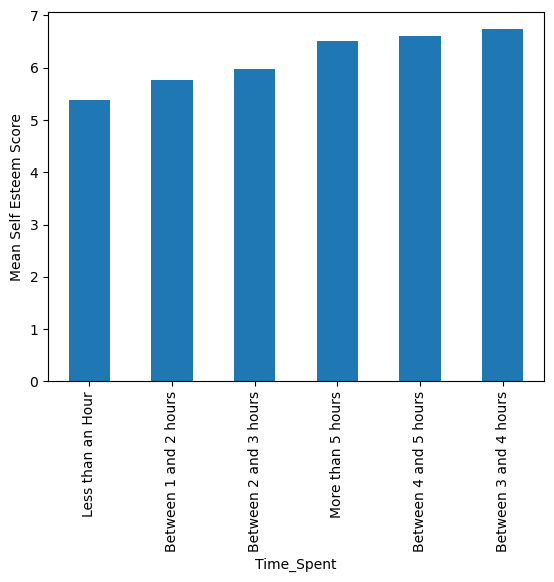

In [51]:
#Let's see the mean self esteem score of each Time group of participants

df.groupby('Time_Spent')['Self Esteem Total'].mean().sort_values(ascending=True).plot.bar(ylabel='Mean Self Esteem Score')

<Axes: xlabel='Time_Spent', ylabel='Mean Depression Score'>

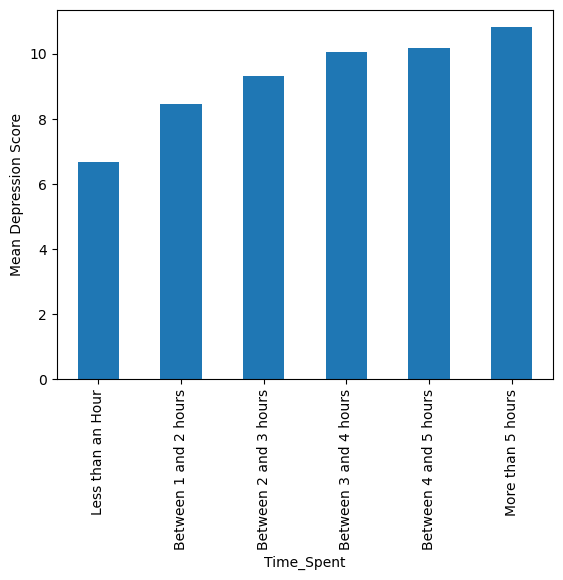

In [52]:
#Let's see the mean Depression score of each Time group of participants

df.groupby('Time_Spent')['Depression Total'].mean().sort_values(ascending=True).plot.bar(ylabel='Mean Depression Score')

As we can see, this shows a clear increase over time in all four categories as time spent on social media increases. This matches our hypothesis from the beginning. 

Our next visualization will be a heatmap that will show correlation from all groups of data from the dataset. This will help illustrate which values may be related to each other.

Now we will convert the 'Time Spent" column from string to integer. This is necessary because heatmaps correlations can be drawn only from numerical values.

This is done by assigning the various 'Time Spent' groups to number based strings, and then converting the whole column from object type to int64.

'Less than an Hour' = 0

'Between 1 and 2 hours' = 1

'Between 2 and 3 hours' = 2

'Between 3 and 4 hours' = 3

'Between 4 and 5 hours' = 4

'More than 5 hours' = 5

In [53]:
df.loc[df['Time_Spent'] == 'Less than an Hour', 'Time_Spent'] = 0
df.loc[df['Time_Spent'] == 'Between 1 and 2 hours', 'Time_Spent'] = 1
df.loc[df['Time_Spent'] == 'Between 2 and 3 hours', 'Time_Spent'] = 2
df.loc[df['Time_Spent'] == 'Between 3 and 4 hours', 'Time_Spent'] = 3
df.loc[df['Time_Spent'] == 'Between 4 and 5 hours', 'Time_Spent'] = 4
df.loc[df['Time_Spent'] == 'More than 5 hours', 'Time_Spent'] = 5
df['Time_Spent'] = df['Time_Spent'].astype('int64')
df.corr()

/var/folders/lb/xh4rrgvs6fx0fw4f8jv1nnwr0000gn/T/ipykernel_69931/796332681.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Age,Time_Spent,Distraction_1,Distraction_2,Stress_1,Distraction_3,Stress_2,Distraction_4,SelfEsteem_1,SelfEsteem_2,SelfEsteem_3,Depression_1,Depression_2,Depression_3,Distraction Total,Stress Total,Self Esteem Total,Depression Total,Total,New Score
Age,1.000000,-0.361760,-0.225191,-0.232057,-0.125738,-0.224444,-0.288705,-0.264529,-0.092542,-0.012974,-0.039000,-0.303666,-0.241454,-0.161311,-0.301539,-0.253520,-0.071719,-0.301396,-0.306438,-0.188698
Time_Spent,-0.361760,1.000000,0.393532,0.380818,0.400058,0.342524,0.326245,0.321685,0.200610,-0.044285,0.109225,0.330489,0.292408,0.174660,0.454950,0.442023,0.128569,0.339560,0.443113,0.342279
Distraction_1,-0.225191,0.393532,1.000000,0.463353,0.359031,0.365491,0.252082,0.288829,0.148203,-0.073300,0.144519,0.315478,0.359379,0.260496,0.649231,0.371636,0.102528,0.400586,0.521741,0.387532
Distraction_2,-0.232057,0.380818,0.463353,1.000000,0.513354,0.607419,0.343307,0.527745,0.288504,-0.039471,0.270144,0.379444,0.389132,0.255362,0.836695,0.520835,0.248794,0.437179,0.689977,0.532291
Stress_1,-0.125738,0.400058,0.359031,0.513354,1.000000,0.514801,0.347036,0.469440,0.320973,-0.071484,0.245925,0.328969,0.384770,0.166601,0.593437,0.816542,0.237581,0.372431,0.629110,0.480991
Distraction_3,-0.224444,0.342524,0.365491,0.607419,0.514801,1.000000,0.462673,0.662768,0.286120,-0.000193,0.172585,0.407667,0.479993,0.291147,0.840468,0.595182,0.224080,0.502587,0.722904,0.534717
Stress_2,-0.288705,0.326245,0.252082,0.343307,0.347036,0.462673,1.000000,0.545904,0.414301,0.025925,0.208847,0.588757,0.430348,0.327367,0.516115,0.824778,0.319667,0.575959,0.691219,0.528841
Distraction_4,-0.264529,0.321685,0.288829,0.527745,0.469440,0.662768,0.545904,1.000000,0.371156,-0.031259,0.242035,0.509794,0.503196,0.354676,0.806598,0.619064,0.282592,0.584886,0.759081,0.554625
SelfEsteem_1,-0.092542,0.200610,0.148203,0.288504,0.320973,0.286120,0.414301,0.371156,1.000000,0.174706,0.417328,0.417801,0.374242,0.193716,0.354574,0.448542,0.791269,0.418397,0.626037,0.523482
SelfEsteem_2,-0.012974,-0.044285,-0.073300,-0.039471,-0.071484,-0.000193,0.025925,-0.031259,0.174706,1.000000,-0.059882,-0.000205,-0.018440,-0.028299,-0.044930,-0.027141,0.587849,-0.020824,0.142928,0.184559


/var/folders/lb/xh4rrgvs6fx0fw4f8jv1nnwr0000gn/T/ipykernel_69931/1688253363.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

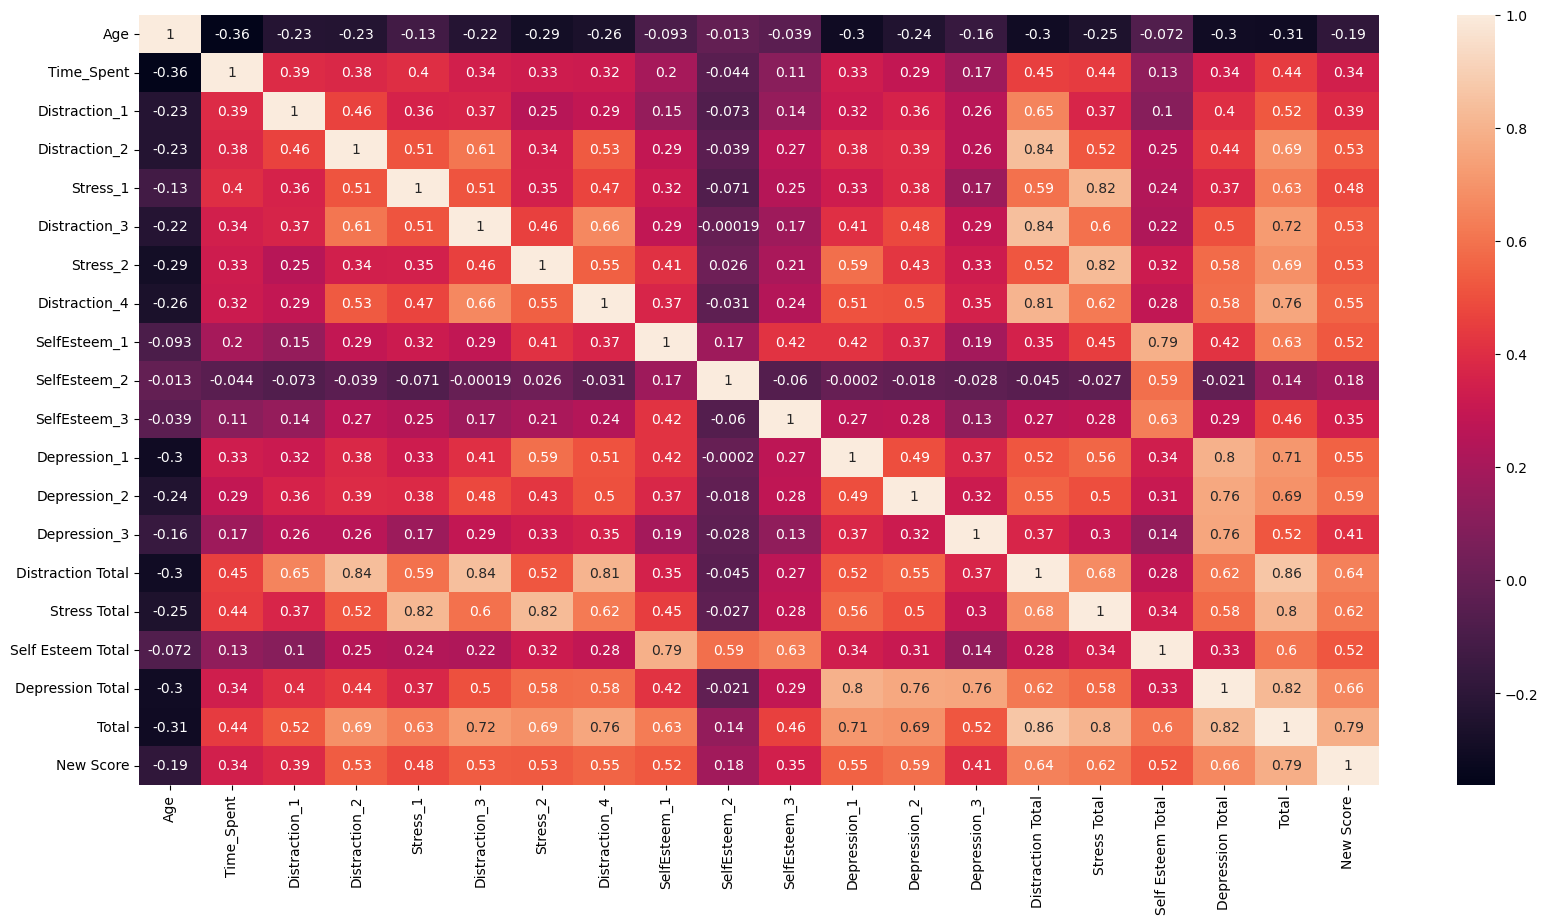

In [54]:
f, ax = plt.subplots(figsize=(20, 10))
corr = df.corr()
sns.heatmap(corr, ax=ax, annot=True)

MODELS: Now for the machine learning component. We are going to run two seperate KNN Classifiers comparing various sets of data. This will help show if time spent is truly related to stress total. 

Following that, we will see if there are other factors that negatively affect depression. Therefore, we are going to look at the correlation betweeen age and depression.

Then we are going to run a hiearchical clustering to analyze the four data totals seperately and see how they overall relate to each other. This will also illustrate if our grouping when cleaning the data set was correct. 

In [55]:
#Following code details the KNN Classifier Creation

X = df[["Time_Spent"]]
Y = df["Stress Total"]

# Train,test,split data (20% segmented for testing)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42) 

# Function used to create the kNN model (default k=5)
model = KNeighborsClassifier()

# Model incorporating train data
model.fit(x_train, y_train)

# Predictions
predictions = model.predict(x_test)

In [56]:
# Accuracy Score of Predictions
from sklearn.metrics import accuracy_score
print("sklearn's accuracy score for Stress Total:", accuracy_score(y_test, predictions))

sklearn's accuracy score for Stress Total: 0.17525773195876287


In [57]:
# Model when k=1
model1 = KNeighborsClassifier(1)
model1.fit(x_train, y_train)
predictions1 = model1.predict(x_test)

# Model when k=10
model10 = KNeighborsClassifier(10)
model10.fit(x_train, y_train)
predictions10 = model10.predict(x_test)

# Model when k=100
model100 = KNeighborsClassifier(100)
model100.fit(x_train, y_train)
predictions100 = model100.predict(x_test)

print("accuracy score when k=1:", accuracy_score(y_test, predictions1))
print("accuracy score when k=10:", accuracy_score(y_test, predictions10))
print("accuracy score when k=100:", accuracy_score(y_test, predictions100))

accuracy score when k=1: 0.16494845360824742
accuracy score when k=10: 0.17525773195876287
accuracy score when k=100: 0.17525773195876287


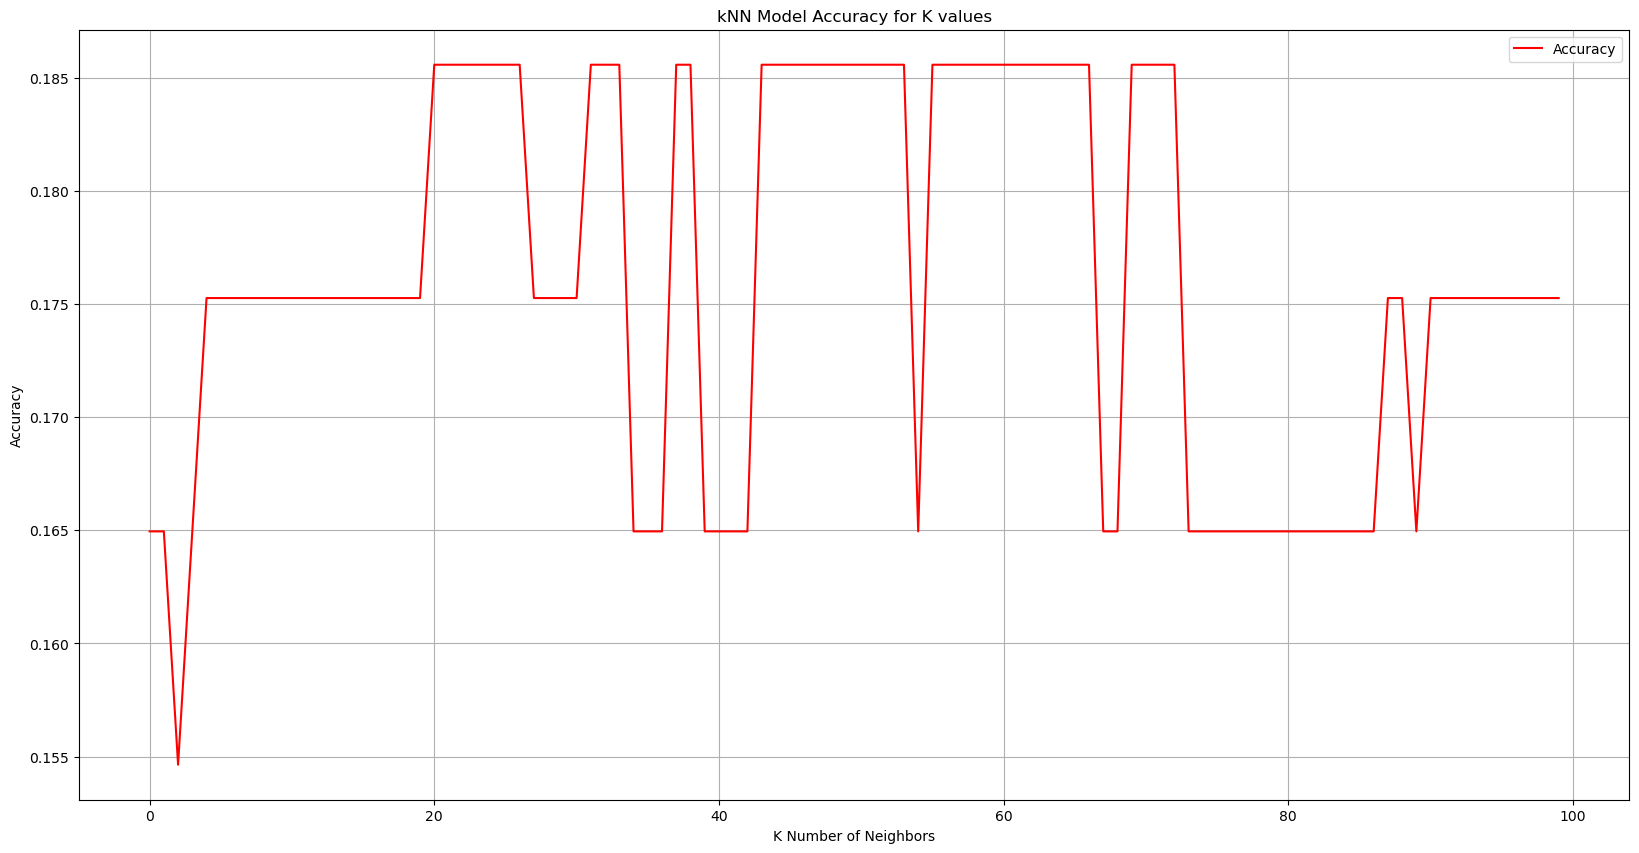

In [58]:
#Determining accurary of model with amount of neighbors between 1 and 100 (inclusive)
x1 = list(range(1,101))
list_1 = []
accuracy = []
for k in x1:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train, y_train)
    
    predictions = model.predict(x_test)
    
    accuracy.append(accuracy_score(y_test, predictions))
    list_1.append(accuracy)
    
    
plt.figure(figsize=(20, 10))
plt.plot(accuracy, color='r', label='Accuracy')
plt.title('kNN Model Accuracy for K values')
plt.xlabel('K Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks()
plt.legend()
plt.grid(True)
plt.show()

The accuracy shows that they may be related but they may not have as much correlation as we anticipated. Now we are moving onto the second classifier.

SECOND KNN CLASSIFIER

In [59]:
#Making the KNN Classifier
X= df[["Age"]]
Y= df["Depression Total"]
# 20% testing size
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42)

model = KNeighborsClassifier()

# TODO fit the model using the train data
model.fit(x_train, y_train)
# TODO store the predictions for the test sets
predictions = model.predict(x_test)

In [60]:
# TODO find the accuracy score of your predictions
from sklearn.metrics import accuracy_score
print("sklearn's accuracy score for Depression Total:", accuracy_score(y_test, predictions))

sklearn's accuracy score for Depression Total: 0.061855670103092786


In [61]:
# Model when k=1
model1 = KNeighborsClassifier(1)
model1.fit(x_train, y_train)
predictions1 = model1.predict(x_test)

# Model when k=10
model10 = KNeighborsClassifier(10)
model10.fit(x_train, y_train)
predictions10 = model10.predict(x_test)

# Model when k=100
model100 = KNeighborsClassifier(100)
model100.fit(x_train, y_train)
predictions100 = model100.predict(x_test)

print("accuracy score when k=1:", accuracy_score(y_test, predictions1))
print("accuracy score when k=10:", accuracy_score(y_test, predictions10))
print("accuracy score when k=100:", accuracy_score(y_test, predictions100))

accuracy score when k=1: 0.08247422680412371
accuracy score when k=10: 0.08247422680412371
accuracy score when k=100: 0.1958762886597938


In [62]:
# accuracy of the model with each value of k from 1-30 inclusive
x1 = list(range(1,31))
list1 = []
accuracy = []
for k in x1:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    accuracy.append(accuracy_score(y_test, predictions))
    list1.append(accuracy)

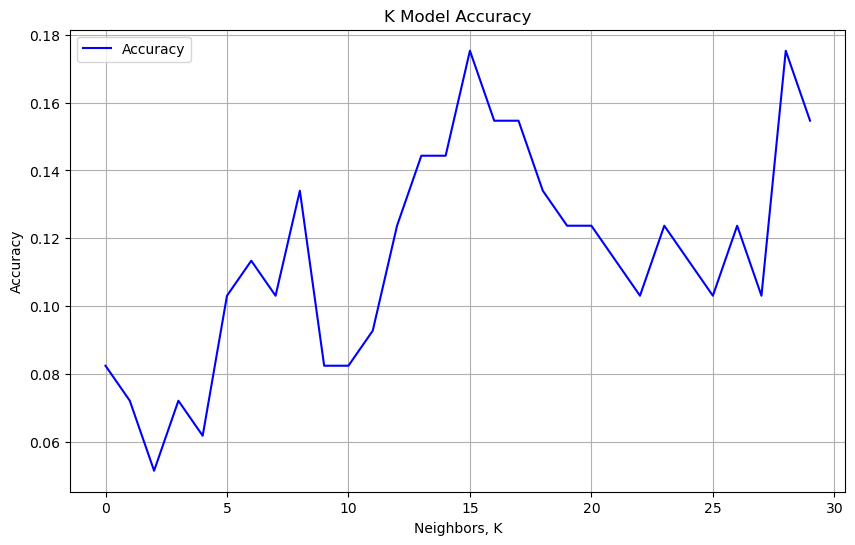

In [63]:
# plot of the accuracy array
plt.figure(figsize=(10,6))
plt.plot(accuracy, color ='b', label = 'Accuracy')
plt.title('K Model Accuracy')
plt.xlabel('Neighbors, K')
plt.ylabel('Accuracy')
plt.xticks()
plt.legend()
plt.grid(True)
plt.show()

This shows that there is some correlation between age and depression. Therefore, there may be other factors that exist outside of social media usage that affect a person's mental health, especially depression. 

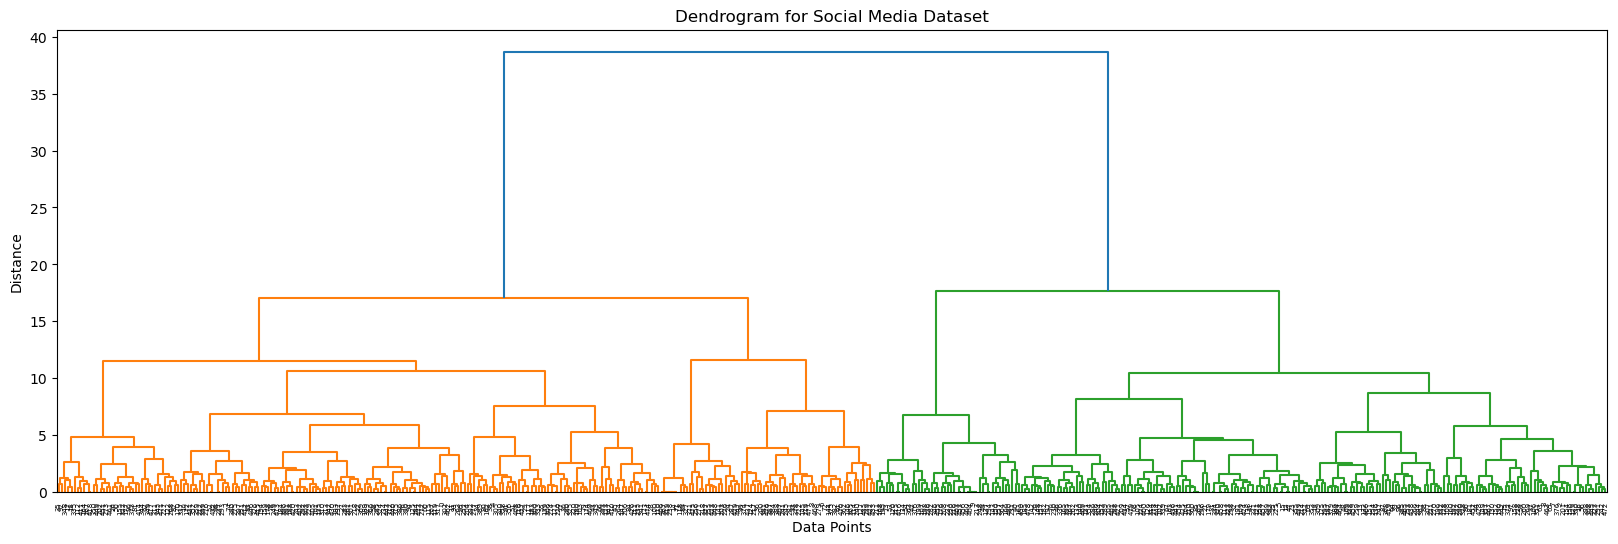

In [64]:
#hierarchial clustering
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
selected_columns = ["Distraction Total", "Stress Total", "Self Esteem Total", "Depression Total"]
new_df= df[selected_columns]

new_df = StandardScaler().fit_transform(new_df)

clusterMatrix= linkage(new_df, method="ward")
plt.figure(figsize=(20, 6))
dendrogram(clusterMatrix)

plt.title('Dendrogram for Social Media Dataset')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()


Write-up:
Overall, we analyzed a set of data about social media usage and mental health. We cleaned the data and broke it up into four seperate categories. We assigned a score to each category as well. Then we created two visualization that illustrated parts of our data. The first one showed correlations between each category and time spent on social media. This was what we anticipated from the beginning. The second one was a heatmap that showed the correlation score between all the specifc data columns in the set. Finally, we moved onto the machine learning model aspect of the project. We created two seperate KNN Classifier machine learning model comparing “age” and “depression” and "time spent" and "stress total" using 20% of the dataset for testing.  We then proceeded to fit the training data, model predictions, and output the accuracy score.  Increasing neighbors, as k increases, in turn increases accuracy scores. To visualize this phenomenon, a K Model Accuracy graph was implemented to illustrate the nonlinear increase of accuracy as neighbors increased. Finally, we created a dendrogram using hierarchial clustering to show how the data was grouped. This illustrated that we did group the data into the appropriate categories. 